In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance

In [2]:
import glob
import tensorflow as tf
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [3]:
# import package
# open dataset
filename = "nds - stroke.csv"
data = pd.read_csv(filename)
with pd.option_context('expand_frame_repr', False):
    print(data.head())
print("Data shape: {}".format(data.shape))

     gft  gender   age  hypertension  alcohol_intake  heart_disease ever_married      work_type Residence_type  avg_glucose_level   bmi   smoking_status  stroke  systotic bp
0   9046    Male  67.0           147             2.0              1          Yes        Private          Urban             228.69  36.6  formerly smoked       1        147.0
1  51676  Female  61.0           135             4.0              0          Yes  Self-employed          Rural             202.21   NaN     never smoked       1        135.0
2  31112    Male  80.0           115             3.0              1          Yes        Private          Rural             105.92  32.5     never smoked       1        115.0
3  60182  Female  49.0           125             2.0              0          Yes        Private          Urban             171.23  34.4           smokes       1        125.0
4   1665  Female  79.0           130             3.0              0          Yes  Self-employed          Rural             174.12 

In [4]:
data.describe()

,gft,age,hypertension,alcohol_intake,heart_disease,avg_glucose_level,bmi,stroke,systotic bp
count,3000.000000,3000.000000,3000.000000,2942.000000,3000.000000,3000.000000,2861.000000,3000.000000,100.000000
mean,36247.929667,44.404907,122.075667,1.563222,0.064333,108.026173,29.102656,0.083000,133.940000
std,21108.583152,22.703023,17.922770,1.222833,0.245387,46.588268,7.925436,0.275928,11.871211
min,77.000000,0.080000,13.000000,0.000000,0.000000,55.220000,10.300000,0.000000,111.000000
25%,17386.250000,26.000000,113.000000,1.000000,0.000000,77.802500,23.600000,0.000000,125.000000
50%,36346.500000,47.000000,124.000000,1.000000,0.000000,93.045000,28.200000,0.000000,134.500000
75%,54543.250000,62.000000,135.000000,2.000000,0.000000,116.055000,33.300000,0.000000,145.000000
max,72918.000000,82.000000,169.000000,6.000000,1.000000,271.740000,97.600000,1.000000,160.000000


In [5]:
data.drop(['systotic bp'], axis = 1) 

,gft,gender,age,hypertension,alcohol_intake,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,147,2.0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,135,4.0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,115,3.0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,125,2.0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,130,3.0,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4750,Male,78.0,148,0.0,0,Yes,Private,Urban,85.03,26.1,formerly smoked,0
2996,65127,Female,35.0,132,4.0,0,Yes,Private,Urban,80.76,28.8,smokes,0
2997,4498,Male,71.0,151,5.0,1,Yes,Private,Urban,204.98,NaN,formerly smoked,0
2998,32203,Female,57.0,140,2.0,0,Yes,Self-employed,Rural,95.36,32.4,formerly smoked,0


In [6]:
data.describe()


,gft,age,hypertension,alcohol_intake,heart_disease,avg_glucose_level,bmi,stroke,systotic bp
count,3000.000000,3000.000000,3000.000000,2942.000000,3000.000000,3000.000000,2861.000000,3000.000000,100.000000
mean,36247.929667,44.404907,122.075667,1.563222,0.064333,108.026173,29.102656,0.083000,133.940000
std,21108.583152,22.703023,17.922770,1.222833,0.245387,46.588268,7.925436,0.275928,11.871211
min,77.000000,0.080000,13.000000,0.000000,0.000000,55.220000,10.300000,0.000000,111.000000
25%,17386.250000,26.000000,113.000000,1.000000,0.000000,77.802500,23.600000,0.000000,125.000000
50%,36346.500000,47.000000,124.000000,1.000000,0.000000,93.045000,28.200000,0.000000,134.500000
75%,54543.250000,62.000000,135.000000,2.000000,0.000000,116.055000,33.300000,0.000000,145.000000
max,72918.000000,82.000000,169.000000,6.000000,1.000000,271.740000,97.600000,1.000000,160.000000


In [7]:
miss_val = data.isnull().sum()/len(data)*100
print(miss_val)
print("# Missing values in variable bmi\t\t: {:.2f}%".format(miss_val['bmi']))
print("# Missing values in variable smoking_status\t: {:.2f}%".format(miss_val['smoking_status']))
print("Data shape: {}".format(data.shape))

gft                   0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
alcohol_intake        1.933333
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   4.633333
smoking_status        0.000000
stroke                0.000000
systotic bp          96.666667
dtype: float64
# Missing values in variable bmi		: 4.63%
# Missing values in variable smoking_status	: 0.00%
Data shape: (3000, 14)


In [8]:
# Safely disable new warning with the chained assignment.
pd.options.mode.chained_assignment = None  # default='warn'
# replace missing values in variable 'bmi' with its mean
data['bmi']=data['bmi'].fillna(data['bmi'].mean())
data['alcohol_intake']=data['alcohol_intake'].fillna(data['alcohol_intake'].mean())
# remove (drop) data associated with missing values in variable 'smoking_status'
clean_data = data[data['smoking_status'].notnull()]
# drop variable 'id'
clean_data.drop(columns='gft',axis=1,inplace=True)
clean_data.drop(columns='systotic bp',axis=1,inplace=True)
clean_data.drop(columns='work_type',axis=1,inplace=True)
clean_data.drop(columns='ever_married',axis=1,inplace=True)
clean_data.drop(columns='Residence_type',axis=1,inplace=True)
# validate there's no more missing values
miss_val = clean_data.isnull().sum()/len(clean_data)*100
print(miss_val)
print("# Missing values in variable 'bmi'\t\t: {}".format(miss_val['bmi']))
print("# Missing values in variable 'smoking_status'\t: {}".format(miss_val['smoking_status']))
print("Shape of data without missing values: {}".format(clean_data.shape))

gender               0.0
age                  0.0
hypertension         0.0
alcohol_intake       0.0
heart_disease        0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64
# Missing values in variable 'bmi'		: 0.0
# Missing values in variable 'smoking_status'	: 0.0
Shape of data without missing values: (3000, 9)


In [9]:
#Changing Category to Numerical Values
#Since some variables are categorical, we have to convert them into numerical variables.
print("Unique 'gender': {}".format(clean_data['gender'].unique()))
#print("Unique 'ever_married': {}".format(clean_data['ever_married'].unique()))
#print("Unique 'work_type': {}".format(clean_data['work_type'].unique()))
#print("Unique 'Residence_type': {}".format(clean_data['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(clean_data['smoking_status'].unique()))

Unique 'gender': ['Male' 'Female']
Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [10]:
# create encoder for each categorical variable
label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()


In [11]:
clean_data['gender'] = label_gender.fit_transform(clean_data['gender'])
#clean_data['ever_married'] = label_married.fit_transform(clean_data['ever_married'])
#clean_data['work_type']= label_work.fit_transform(clean_data['work_type'])
#clean_data['Residence_type']= label_residence.fit_transform(clean_data['Residence_type'])
clean_data['smoking_status']= label_smoking.fit_transform(clean_data['smoking_status'])
with pd.option_context('expand_frame_repr', False):
    print(clean_data.head())

   gender   age  hypertension  alcohol_intake  heart_disease  avg_glucose_level        bmi  smoking_status  stroke
0       1  67.0           147             2.0              1             228.69  36.600000               1       1
1       0  61.0           135             4.0              0             202.21  29.102656               2       1
2       1  80.0           115             3.0              1             105.92  32.500000               2       1
3       0  49.0           125             2.0              0             171.23  34.400000               3       1
4       0  79.0           130             3.0              0             174.12  24.000000               2       1


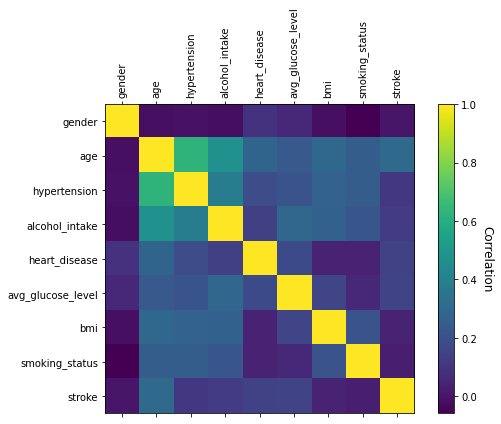

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.matshow(clean_data.corr())
ax.set_xticks(np.arange(clean_data.shape[1]))
ax.set_yticks(np.arange(clean_data.shape[1]))
ax.set_xticklabels(clean_data.columns,rotation=90)
ax.set_yticklabels(clean_data.columns)
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
plt.show()

C:\Users\emmy1\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\emmy1\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\emmy1\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\emmy1\Anaconda3\lib\site-packages\pandas\plotting\_matpl

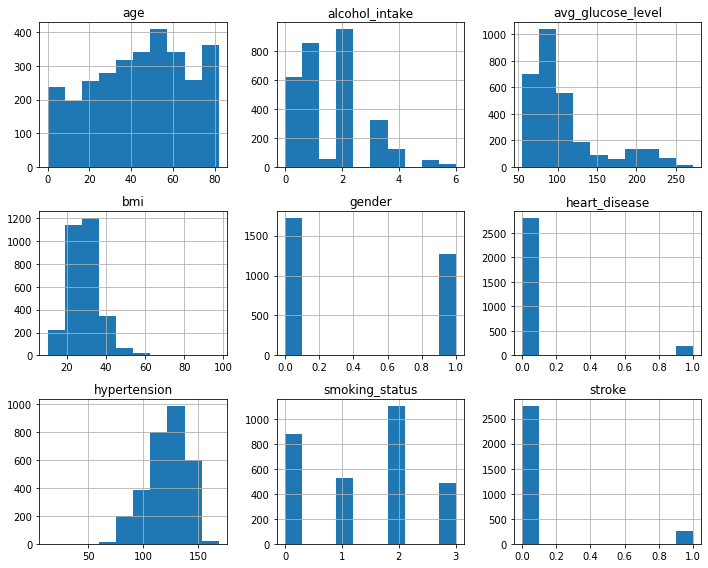

In [13]:
fig = clean_data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

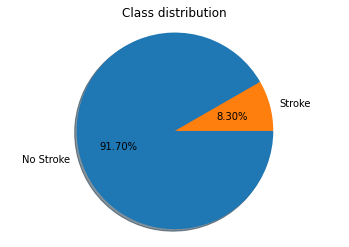

# samples associated with no stroke: 2751
# samples associated with stroke: 249


In [14]:
class_occur = clean_data['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

In [15]:
# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_sample(clean_data.loc[:,clean_data.columns!='stroke'], clean_data['stroke'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (5502, 8)
Shape of y: (5502,)


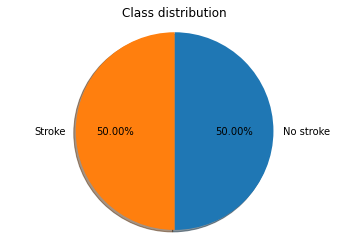

# samples associated with no stroke: 2751
# samples associated with stroke: 2751


In [16]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

In [22]:
X = clean_data.drop(["stroke"], axis=1)
Y = clean_data["stroke"]

In [48]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [47]:
X.head()


,gender,age,hypertension,alcohol_intake,heart_disease,avg_glucose_level,bmi,smoking_status
0,1.0,0.816895,0.858974,0.333333,1.0,0.801173,0.301260,0.333333
1,0.0,0.743652,0.782051,0.666667,0.0,0.678875,0.215380,0.666667
2,1.0,0.975586,0.653846,0.500000,1.0,0.234159,0.254296,0.666667
3,0.0,0.597168,0.717949,0.333333,0.0,0.535793,0.276060,1.000000
4,0.0,0.963379,0.750000,0.500000,0.0,0.549141,0.156930,0.666667


In [38]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names]=x_scaler.transform(X)

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size= 0.2, shuffle = True)

In [40]:
model = k.Sequential()

In [41]:
model.add(k.layers.Dense(8,activation=tf.nn.relu,input_shape=(X_train_res.shape[1],)))
model.add(k.layers.Dense(64,activation=tf.nn.relu))
model.add(k.layers.Dense(32,activation=tf.nn.relu))
model.add(k.layers.Dense(32,activation=tf.nn.relu))
model.add(k.layers.Dense(16,activation=tf.nn.relu))
model.add(k.layers.Dense(1,activation =tf.nn.sigmoid))

In [42]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
history = model.fit(X_train_res, Y_train_res, epochs = 2000, batch_size = X_train_res.shape[0])

score, acc = model.evaluate(X_test, Y_test,
                            batch_size=X_test.shape[0])
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 0s/step - loss: 0.6946 - accuracy: 0.4991
Epoch 3/2000
1/1 [==============================] - 0s 0s/step - loss: 0.6919 - accuracy: 0.5443
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6899 - accuracy: 0.6339
Epoch 5/2000
1/1 [==============================] - 0s 999us/step - loss: 0.6884 - accuracy: 0.5921
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5456
Epoch 7/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5100
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.5123
Epoch 9/2000
1/1 [==============================] - 0s 0s/step - loss: 0.6834 - accuracy: 0.5213
Epoch 10/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.5331
Epoch 11/2000
1/1 [

1/1 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.7873
Epoch 84/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.7873
Epoch 85/2000
1/1 [==============================] - 0s 999us/step - loss: 0.4572 - accuracy: 0.7878
Epoch 86/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4560 - accuracy: 0.7871
Epoch 87/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.7892
Epoch 88/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4536 - accuracy: 0.7910
Epoch 89/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4525 - accuracy: 0.7914
Epoch 90/2000
1/1 [==============================] - 0s 0s/step - loss: 0.4515 - accuracy: 0.7919
Epoch 91/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7914
Epoch 92/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4498 - accuracy: 0.7921
Epoch 93/2000
1/1 [====

1/1 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8153
Epoch 166/2000
1/1 [==============================] - 0s 0s/step - loss: 0.4230 - accuracy: 0.8159
Epoch 167/2000
1/1 [==============================] - 0s 0s/step - loss: 0.4228 - accuracy: 0.8159
Epoch 168/2000
1/1 [==============================] - 0s 0s/step - loss: 0.4226 - accuracy: 0.8162
Epoch 169/2000
1/1 [==============================] - ETA: 0s - loss: 0.4224 - accuracy: 0.81 - 0s 4ms/step - loss: 0.4224 - accuracy: 0.8159
Epoch 170/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8157
Epoch 171/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.4220 - accuracy: 0.8159
Epoch 172/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4218 - accuracy: 0.8162
Epoch 173/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8162
Epoch 174/2000
1/1 [==============================] - 0s 2ms/step - loss: 0

1/1 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8234
Epoch 246/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8212
Epoch 247/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8236
Epoch 248/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.4063 - accuracy: 0.8216
Epoch 249/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4061 - accuracy: 0.8218
Epoch 250/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4059 - accuracy: 0.8241
Epoch 251/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.8225
Epoch 252/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8250
Epoch 253/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4053 - accuracy: 0.8232
Epoch 254/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4051 - accuracy: 0.8250
Epoch 255/2000


1/1 [==============================] - 0s 4ms/step - loss: 0.3846 - accuracy: 0.8361
Epoch 328/2000
1/1 [==============================] - 0s 997us/step - loss: 0.3844 - accuracy: 0.8368
Epoch 329/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3842 - accuracy: 0.8355
Epoch 330/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8373
Epoch 331/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3837 - accuracy: 0.8355
Epoch 332/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3834 - accuracy: 0.8368
Epoch 333/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3832 - accuracy: 0.8357
Epoch 334/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8375
Epoch 335/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3827 - accuracy: 0.8373
Epoch 336/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3825 - accuracy: 0.8375
Epoch 337/200

1/1 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8427
Epoch 410/2000
1/1 [==============================] - 0s 991us/step - loss: 0.3697 - accuracy: 0.8416
Epoch 411/2000
1/1 [==============================] - 0s 998us/step - loss: 0.3693 - accuracy: 0.8432
Epoch 412/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.8432
Epoch 413/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8434
Epoch 414/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3687 - accuracy: 0.8441
Epoch 415/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3687 - accuracy: 0.8420
Epoch 416/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3687 - accuracy: 0.8441
Epoch 417/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3685 - accuracy: 0.8420
Epoch 418/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8441
Epoch 419/2

1/1 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8518
Epoch 492/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3551 - accuracy: 0.8516
Epoch 493/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3547 - accuracy: 0.8513
Epoch 494/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3544 - accuracy: 0.8522
Epoch 495/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.8511
Epoch 496/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3540 - accuracy: 0.8520
Epoch 497/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8525
Epoch 498/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3539 - accuracy: 0.8529
Epoch 499/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.3538 - accuracy: 0.8529
Epoch 500/2000
1/1 [==============================] - 0s 0s/step - loss: 0.3538 - accuracy: 0.8520
Epoch 501/2000
1

1/1 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8570
Epoch 573/2000
1/1 [==============================] - 0s 996us/step - loss: 0.3433 - accuracy: 0.8586
Epoch 574/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3430 - accuracy: 0.8570
Epoch 575/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3425 - accuracy: 0.8566
Epoch 576/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3421 - accuracy: 0.8570
Epoch 577/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3418 - accuracy: 0.8588
Epoch 578/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.8593
Epoch 579/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3416 - accuracy: 0.8572
Epoch 580/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3417 - accuracy: 0.8591
Epoch 581/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3417 - accuracy: 0.8575
Epoch 582/200

1/1 [==============================] - 0s 3ms/step - loss: 0.3289 - accuracy: 0.8659
Epoch 655/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3290 - accuracy: 0.8656
Epoch 656/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8640
Epoch 657/2000
1/1 [==============================] - 0s 997us/step - loss: 0.3294 - accuracy: 0.8645
Epoch 658/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8631
Epoch 659/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8638
Epoch 660/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8625
Epoch 661/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3288 - accuracy: 0.8645
Epoch 662/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3282 - accuracy: 0.8638
Epoch 663/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3277 - accuracy: 0.8659
Epoch 664/200

1/1 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8709
Epoch 736/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3160 - accuracy: 0.8693
Epoch 737/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3157 - accuracy: 0.8713
Epoch 738/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3153 - accuracy: 0.8704
Epoch 739/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3149 - accuracy: 0.8727
Epoch 740/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3146 - accuracy: 0.8711
Epoch 741/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.3144 - accuracy: 0.8718
Epoch 742/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3142 - accuracy: 0.8722
Epoch 743/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3141 - accuracy: 0.8711
Epoch 744/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.3141 - accuracy: 0.8727
Epoch 745/2000


1/1 [==============================] - 0s 0s/step - loss: 0.3047 - accuracy: 0.8761
Epoch 817/2000
1/1 [==============================] - 0s 997us/step - loss: 0.3034 - accuracy: 0.8768
Epoch 818/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.8770
Epoch 819/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8777
Epoch 820/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.8740
Epoch 821/2000
1/1 [==============================] - 0s 999us/step - loss: 0.3048 - accuracy: 0.8777
Epoch 822/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3032 - accuracy: 0.8765
Epoch 823/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3028 - accuracy: 0.8768
Epoch 824/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8768
Epoch 825/2000
1/1 [==============================] - 0s 998us/step - loss: 0.3041 - accuracy: 0.8759
Epoch 826/

Epoch 898/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2949 - accuracy: 0.8804
Epoch 899/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2950 - accuracy: 0.8827
Epoch 900/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2953 - accuracy: 0.8797
Epoch 901/2000
1/1 [==============================] - 0s 999us/step - loss: 0.2955 - accuracy: 0.8820
Epoch 902/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8793
Epoch 903/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2956 - accuracy: 0.8827
Epoch 904/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2955 - accuracy: 0.8795
Epoch 905/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2950 - accuracy: 0.8824
Epoch 906/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2946 - accuracy: 0.8813
Epoch 907/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2941 - accuracy: 0.8829
E

1/1 [==============================] - 0s 0s/step - loss: 0.2879 - accuracy: 0.8856
Epoch 980/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2874 - accuracy: 0.8865
Epoch 981/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.8854
Epoch 982/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2868 - accuracy: 0.8845
Epoch 983/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2869 - accuracy: 0.8856
Epoch 984/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2870 - accuracy: 0.8865
Epoch 985/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2872 - accuracy: 0.8854
Epoch 986/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.2873 - accuracy: 0.8856
Epoch 987/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2876 - accuracy: 0.8854
Epoch 988/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.2877 - accuracy: 0.8847
Epoch 989/2000
1/

1/1 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8861
Epoch 1061/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2828 - accuracy: 0.8872
Epoch 1062/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2826 - accuracy: 0.8861
Epoch 1063/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.2820 - accuracy: 0.8870
Epoch 1064/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.8867
Epoch 1065/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.2808 - accuracy: 0.8883
Epoch 1066/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2803 - accuracy: 0.8881
Epoch 1067/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.2801 - accuracy: 0.8892
Epoch 1068/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.2801 - accuracy: 0.8879
Epoch 1069/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2804 - accuracy: 0.8877
Epoch 1

1/1 [==============================] - 0s 998us/step - loss: 0.2775 - accuracy: 0.8890
Epoch 1142/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.8883
Epoch 1143/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2771 - accuracy: 0.8890
Epoch 1144/2000
1/1 [==============================] - 0s 998us/step - loss: 0.2763 - accuracy: 0.8877
Epoch 1145/2000
1/1 [==============================] - 0s 1000us/step - loss: 0.2750 - accuracy: 0.8904
Epoch 1146/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2742 - accuracy: 0.8895
Epoch 1147/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2738 - accuracy: 0.8908
Epoch 1148/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.2737 - accuracy: 0.8904
Epoch 1149/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.8892
Epoch 1150/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2743 - accuracy: 0.8908

1/1 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.8954
Epoch 1222/2000
1/1 [==============================] - 0s 997us/step - loss: 0.2674 - accuracy: 0.8936
Epoch 1223/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2679 - accuracy: 0.8954
Epoch 1224/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2684 - accuracy: 0.8924
Epoch 1225/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.8945
Epoch 1226/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2698 - accuracy: 0.8917
Epoch 1227/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.2708 - accuracy: 0.8938
Epoch 1228/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.8929
Epoch 1229/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.8947
Epoch 1230/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2679 - accuracy: 0.8938
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.8976
Epoch 1303/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2610 - accuracy: 0.8970
Epoch 1304/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2604 - accuracy: 0.8981
Epoch 1305/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.2599 - accuracy: 0.8985
Epoch 1306/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2594 - accuracy: 0.8988
Epoch 1307/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2591 - accuracy: 0.8974
Epoch 1308/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2590 - accuracy: 0.8976
Epoch 1309/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.8985
Epoch 1310/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2592 - accuracy: 0.8985
Epoch 1311/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.8997
Epoch 13

1/1 [==============================] - 0s 3ms/step - loss: 0.2554 - accuracy: 0.8999
Epoch 1383/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.9004
Epoch 1384/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2539 - accuracy: 0.9001
Epoch 1385/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2538 - accuracy: 0.8995
Epoch 1386/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.8999
Epoch 1387/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2545 - accuracy: 0.9004
Epoch 1388/2000
1/1 [==============================] - ETA: 0s - loss: 0.2552 - accuracy: 0.89 - 0s 0s/step - loss: 0.2552 - accuracy: 0.8999
Epoch 1389/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2558 - accuracy: 0.9010
Epoch 1390/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2569 - accuracy: 0.8999
Epoch 1391/2000
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 998us/step - loss: 0.2483 - accuracy: 0.9022
Epoch 1463/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.2485 - accuracy: 0.9008
Epoch 1464/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.9040
Epoch 1465/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2491 - accuracy: 0.9020
Epoch 1466/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.9031
Epoch 1467/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2496 - accuracy: 0.9024
Epoch 1468/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.9026
Epoch 1469/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.9029
Epoch 1470/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2498 - accuracy: 0.9031
Epoch 1471/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2493 - accuracy: 0.9022
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.2438 - accuracy: 0.9047
Epoch 1543/2000
1/1 [==============================] - 0s 988us/step - loss: 0.2436 - accuracy: 0.9029
Epoch 1544/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.2432 - accuracy: 0.9049
Epoch 1545/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.2427 - accuracy: 0.9042
Epoch 1546/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2425 - accuracy: 0.9051
Epoch 1547/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2425 - accuracy: 0.9044
Epoch 1548/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9035
Epoch 1549/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.2424 - accuracy: 0.9047
Epoch 1550/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2425 - accuracy: 0.9035
Epoch 1551/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.2426 - accuracy: 0.9056
Epoch

1/1 [==============================] - 0s 3ms/step - loss: 0.2378 - accuracy: 0.9076
Epoch 1624/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.9081
Epoch 1625/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2374 - accuracy: 0.9081
Epoch 1626/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2375 - accuracy: 0.9079
Epoch 1627/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2377 - accuracy: 0.9072
Epoch 1628/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.2381 - accuracy: 0.9074
Epoch 1629/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.9088
Epoch 1630/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.2388 - accuracy: 0.9079
Epoch 1631/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.9085
Epoch 1632/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.2392 - accuracy: 0.9090
Epoch 1

1/1 [==============================] - 0s 997us/step - loss: 0.2335 - accuracy: 0.9106
Epoch 1705/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.9092
Epoch 1706/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2339 - accuracy: 0.9124
Epoch 1707/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.2343 - accuracy: 0.9090
Epoch 1708/2000
1/1 [==============================] - 0s 998us/step - loss: 0.2347 - accuracy: 0.9115
Epoch 1709/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.2353 - accuracy: 0.9099
Epoch 1710/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2356 - accuracy: 0.9103
Epoch 1711/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2361 - accuracy: 0.9106
Epoch 1712/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2360 - accuracy: 0.9108
Epoch 1713/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2360 - accuracy: 0.9103
Epo

1/1 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.9128
Epoch 1786/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2332 - accuracy: 0.9106
Epoch 1787/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2317 - accuracy: 0.9110
Epoch 1788/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2308 - accuracy: 0.9103
Epoch 1789/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.2297 - accuracy: 0.9133
Epoch 1790/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2291 - accuracy: 0.9113
Epoch 1791/2000
1/1 [==============================] - 0s 999us/step - loss: 0.2289 - accuracy: 0.9113
Epoch 1792/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2290 - accuracy: 0.9122
Epoch 1793/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2294 - accuracy: 0.9103
Epoch 1794/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2298 - accuracy: 0.9144
Epoch 1

1/1 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.9144
Epoch 1867/2000
1/1 [==============================] - 0s 0s/step - loss: 0.2260 - accuracy: 0.9149
Epoch 1868/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2267 - accuracy: 0.9122
Epoch 1869/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.2272 - accuracy: 0.9158
Epoch 1870/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9124
Epoch 1871/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2281 - accuracy: 0.9149
Epoch 1872/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2285 - accuracy: 0.9117
Epoch 1873/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2279 - accuracy: 0.9151
Epoch 1874/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9124
Epoch 1875/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2270 - accuracy: 0.9153
Epoch 1

1/1 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.9142
Epoch 1948/2000
1/1 [==============================] - 0s 996us/step - loss: 0.2226 - accuracy: 0.9169
Epoch 1949/2000
1/1 [==============================] - 0s 997us/step - loss: 0.2232 - accuracy: 0.9128
Epoch 1950/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.9178
Epoch 1951/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.2236 - accuracy: 0.9131
Epoch 1952/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9172
Epoch 1953/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9135
Epoch 1954/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2227 - accuracy: 0.9174
Epoch 1955/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9135
Epoch 1956/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2219 - accuracy: 0.9167
Ep

In [45]:
new_input = [[0,67,147,2.0,1,228.69,36.6,0]]
# get prediction for new input
new_output =model.predict(new_input)
# summarize input and output
print(new_input, new_output)

[[0, 67, 147, 2.0, 1, 228.69, 36.6, 0]] [[0.]]
